In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# install R for Google Colab
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 KB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp39-cp39-linux_x86_64.whl size=317890 sha256=8f4fca8719efeb069891b568b4c626a852feb1175c8858949cf85eaae6ebc786
  Stored in directory: /root/.cache/pip/wheels/09/e7/bc/33685b60ab54dba969596dd87244ee9f4c2e83dff9a53d4f20
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [ ]:
# load R to run in this notebook
%load_ext rpy2.ipython

In [ ]:
# install R packages required for data cleaning, analysis, modeling etc.
%%R
install.packages("validate")
install.packages("nnet")
install.packages("stats")
install.packages("corrplot")

(as ‘lib’ is unspecified)














	‘/tmp/RtmpxpPoIe/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpxpPoIe/downloaded_packages’

(as ‘lib’ is unspecified)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpxpPoIe/downloaded_packages’



In [ ]:
# load R packages
%%R
library(tidyverse)
library(validate)
library(dplyr)
library(ggplot2)
library(scales)
library(nnet)
library(corrplot)


✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘validate’



    expr



    expr


Attaching package: ‘scales’



    number_format



    discard



    col_factor





# **The Data**

The link to the dataset can be found here: https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system?resource=download&select=2015.csv

Please download the 2015 version if required. 

The data contains responses from individuals in the 2015 BRFSS survey. It contains around 300 answers(columns). For the purpose of our analysis, we will choose to focus on features which align with the major risk factors concerning diabetes, which are listed below.


*   blood pressure (high)
* cholesterol (high)
* smoking
* diabetes
* obesity
* age
* sex
* race
* diet
* exercise
* alcohol consumption
* BMI
* Household Income
* Marital Status
* Sleep
* Time since last checkup
* Education
* Health care coverage
* Mental Health




# **1. Data Loading and Preperation**



In [ ]:
#imports
import os
import pandas as pd
import numpy as np
import random
random.seed(1)

In [ ]:
diabetes_2015_df = pd.read_csv("//content/drive/MyDrive/Diabetes_CDC_2015.csv")

In [ ]:
diabetes_2015_df.shape

(441456, 330)

In [ ]:
pd.set_option('display.max_columns', 500)
diabetes_2015_df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,EXACTOT1,EXACTOT2,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.000000e+00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,NaN,2.0,1.0,4.0,1.0,2.0,NaN,1.0,2.0,8.0,88.0,3.0,2.0,280.0,510.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,NaN,2.0,3.0,888.0,NaN,NaN,NaN,305.0,310.0,320.0,310.0,305.0,101.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,1.0,1.0,6.0,1.0,1.0,112014.0,1.0,1.0,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,b'',b'',3.0,11011.0,28.78156,3.0,86.344681,NaN,NaN,NaN,NaN,1.0,0.614125,341.384853,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,70.0,178.0,12701.0,4018.0,4.0,2.0,1.0,2.0

The dataset contains ~440000 rows and 330 columns, where each row contains an individual's survey responses. 

For the purpose of our analysis, we will choose columns which are close to the potential risk factors for diabetes, as stated in the previous section.

In [ ]:
# select specific columns
diabetes_df_selected = diabetes_2015_df[['DIABETE3',
                                         '_RFHYPE5',  
                                         'TOLDHI2', '_CHOLCHK', 
                                         '_BMI5', 
                                         'SMOKE100', 
                                         'CVDSTRK3', '_MICHD', 
                                         '_TOTINDA', 
                                         '_FRTLT1', '_VEGLT1', 
                                         '_RFDRHV5', 
                                         'HLTHPLN1', 'MEDCOST', 
                                         'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 
                                         'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2' ]]

In [ ]:
diabetes_df_selected.shape

(441456, 22)

In [ ]:
diabetes_df_selected.head()

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,_VEGLT1,_RFDRHV5,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,3.0,2.0,1.0,1.0,4018.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,5.0,18.0,15.0,1.0,2.0,9.0,4.0,3.0
1,3.0,1.0,2.0,2.0,2509.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,3.0,88.0,88.0,2.0,2.0,7.0,6.0,1.0
2,3.0,1.0,1.0,1.0,2204.0,NaN,1.0,NaN,9.0,9.0,9.0,9.0,1.0,2.0,4.0,88.0,15.0,NaN,2.0,11.0,4.0,99.0
3,3.0,2.0,1.0,1.0,2819.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,5.0,30.0,30.0,1.0,2.0,9.0,4.0,8.0
4,3.0,1.0,2.0,1.0,2437.0,2.0,2.0,2.0,2.0,9.0,1.0,1.0,1.0,2.0,5.0,88.0,20.0,2.0,2.0,9.0,5.0,77.0


In [ ]:
diabetes_df_selected.to_csv('/content/drive/MyDrive/diabetes_selected.csv')

# **Data Cleaning**

### Drop missing values

In [ ]:
diabetes_df_selected = diabetes_df_selected.dropna()
diabetes_df_selected.shape

(343606, 22)

### Modifying variable values for ML/DL suitability

This part will involve changing the default values for each column(answer) to be more suitable for our analysis. Most of the answers in the survey has "don't know" or "refused to answer" has options, which contributes nothing to our analysis. We will remove rows with these answers. We will also change the scale of answers where the absence of a factor will be categorised as 0 whereas presence be denoted by 1 and more. This will keep our variable values consistent and easy to interpret, and may also help us during ML/DL training.

In [ ]:
# DIABETE3
# 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
# Remove all 7 (dont knows)
# Remove all 9 (refused)
diabetes_df_selected['DIABETE3'] = diabetes_df_selected['DIABETE3'].replace({2:0, 3:0, 1:2, 4:1})
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.DIABETE3 != 7]
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.DIABETE3 != 9]
diabetes_df_selected.DIABETE3.unique()

array([0., 2., 1.])

In [ ]:
# 1 _RFHYPE5
# 1 -> 0 (No high blood pressure) 
# 2 -> 1 (high blood pressure)
diabetes_df_selected['_RFHYPE5'] = diabetes_df_selected['_RFHYPE5'].replace({1:0, 2:1})
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected._RFHYPE5 != 9]
diabetes_df_selected._RFHYPE5.unique()

array([1., 0.])

In [ ]:
#2 TOLDHI2
# 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
diabetes_df_selected['TOLDHI2'] = diabetes_df_selected['TOLDHI2'].replace({2:0})
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.TOLDHI2 != 7]
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.TOLDHI2 != 9]
diabetes_df_selected.TOLDHI2.unique()

array([1., 0.])

In [ ]:
#3 _CHOLCHK
# Change 3 to 0 and 2 to 0 for Not checked cholesterol in past 5 years
# Remove 9
diabetes_df_selected['_CHOLCHK'] = diabetes_df_selected['_CHOLCHK'].replace({3:0,2:0})
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected._CHOLCHK != 9]
diabetes_df_selected._CHOLCHK.unique()

array([1., 0.])

In [ ]:
#4 _BMI5 
# BMI values are multiplied by 100. We will revert the values back to original values.
diabetes_df_selected['_BMI5'] = diabetes_df_selected['_BMI5'].div(100).round(0)
diabetes_df_selected._BMI5.unique()

array([40., 25., 28., 24., 27., 30., 26., 23., 34., 33., 21., 22., 31.,
       38., 20., 19., 32., 46., 41., 37., 36., 29., 35., 18., 54., 45.,
       39., 47., 43., 55., 49., 42., 17., 16., 48., 44., 50., 59., 15.,
       52., 53., 57., 51., 14., 58., 63., 61., 56., 60., 74., 62., 64.,
       13., 66., 73., 65., 68., 85., 71., 84., 67., 70., 82., 79., 92.,
       72., 88., 96., 81., 12., 77., 95., 75., 91., 69., 76., 87., 89.,
       83., 98., 86., 80., 90., 78., 97.])

In [ ]:
#5 SMOKE100
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
diabetes_df_selected['SMOKE100'] = diabetes_df_selected['SMOKE100'].replace({2:0})
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.SMOKE100 != 7]
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.SMOKE100 != 9]
diabetes_df_selected.SMOKE100.unique()

array([1., 0.])

In [ ]:
#6 CVDSTRK3
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
diabetes_df_selected['CVDSTRK3'] = diabetes_df_selected['CVDSTRK3'].replace({2:0})
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.CVDSTRK3 != 7]
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.CVDSTRK3 != 9]
diabetes_df_selected.CVDSTRK3.unique()

array([0., 1.])

In [ ]:
#7 _MICHD
#Change 2 to 0 (did not have MI or CHD)
diabetes_df_selected['_MICHD'] = diabetes_df_selected['_MICHD'].replace({2: 0})
diabetes_df_selected._MICHD.unique()

array([0., 1.])

In [ ]:
#8 _TOTINDA
# 1 for physical activity
# change 2 to 0 for no physical activity
# Remove all 9 (don't know/refused)
diabetes_df_selected['_TOTINDA'] = diabetes_df_selected['_TOTINDA'].replace({2:0})
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected._TOTINDA != 9]
diabetes_df_selected._TOTINDA.unique()

array([0., 1.])

In [ ]:
#9 _FRTLT1
# Change 2 to 0. this means no fruit consumed per day. 1 will mean consumed 1 or more pieces of fruit per day 
# remove all dont knows and missing 9
diabetes_df_selected['_FRTLT1'] = diabetes_df_selected['_FRTLT1'].replace({2:0})
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected._FRTLT1 != 9]
diabetes_df_selected._FRTLT1.unique()

array([0., 1.])

In [ ]:
#10 _VEGLT1
# Change 2 to 0. this means no vegetables consumed per day. 1 will mean consumed 1 or more pieces of vegetable per day 
# remove all dont knows and missing 9
diabetes_df_selected['_VEGLT1'] = diabetes_df_selected['_VEGLT1'].replace({2:0})
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected._VEGLT1 != 9]
diabetes_df_selected._VEGLT1.unique()

array([1., 0.])

In [ ]:
#11 _RFDRHV5
# Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)
# remove all dont knows and missing 9
diabetes_df_selected['_RFDRHV5'] = diabetes_df_selected['_RFDRHV5'].replace({1:0, 2:1})
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected._RFDRHV5 != 9]
diabetes_df_selected._RFDRHV5.unique()

array([0., 1.])

In [ ]:
#12 HLTHPLN1
# 1 is yes, change 2 to 0 because it is No health care access
# remove 7 and 9 for don't know or refused
diabetes_df_selected['HLTHPLN1'] = diabetes_df_selected['HLTHPLN1'].replace({2:0})
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.HLTHPLN1 != 7]
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.HLTHPLN1 != 9]
diabetes_df_selected.HLTHPLN1.unique()

array([1., 0.])

In [ ]:
#13 MEDCOST
# Change 2 to 0 for no, 1 is already yes
# remove 7 for don/t know and 9 for refused
diabetes_df_selected['MEDCOST'] = diabetes_df_selected['MEDCOST'].replace({2:0})
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.MEDCOST != 7]
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.MEDCOST != 9]
diabetes_df_selected.MEDCOST.unique()

array([0., 1.])

In [ ]:
#14 GENHLTH
# Remove 7 and 9 for don't know and refused
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.GENHLTH != 7]
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.GENHLTH != 9]
diabetes_df_selected.GENHLTH.unique()

array([5., 3., 2., 4., 1.])

In [ ]:
#15 MENTHLTH
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
diabetes_df_selected['MENTHLTH'] = diabetes_df_selected['MENTHLTH'].replace({88:0})
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.MENTHLTH != 77]
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.MENTHLTH != 99]
diabetes_df_selected.MENTHLTH.unique()

array([18.,  0., 30.,  3.,  5., 15., 10.,  6., 20.,  2., 25.,  1., 29.,
        4.,  7.,  8., 21., 14., 26.,  9., 16., 28., 11., 12., 24., 17.,
       13., 23., 27., 19., 22.])

In [ ]:
#16 PHYSHLTH
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
diabetes_df_selected['PHYSHLTH'] = diabetes_df_selected['PHYSHLTH'].replace({88:0})
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.PHYSHLTH != 77]
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.PHYSHLTH != 99]
diabetes_df_selected.PHYSHLTH.unique()

array([15.,  0., 30.,  2., 14., 28.,  7., 20.,  3., 10.,  1.,  5., 17.,
        4., 19.,  6., 21., 12.,  8., 25., 27., 22., 29., 24.,  9., 16.,
       18., 23., 13., 26., 11.])

In [ ]:
#17 DIFFWALK
# change 2 to 0 for no. 1 is already yes
# remove 7 and 9 for don't know not sure and refused
diabetes_df_selected['DIFFWALK'] = diabetes_df_selected['DIFFWALK'].replace({2:0})
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.DIFFWALK != 7]
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.DIFFWALK != 9]
diabetes_df_selected.DIFFWALK.unique()

array([1., 0.])

In [ ]:
#18 SEX
# change 2 to 0 (female as 0). Male is 1
diabetes_df_selected['SEX'] = diabetes_df_selected['SEX'].replace({2:0})
diabetes_df_selected.SEX.unique()

array([0., 1.])

In [ ]:
#19 _AGEG5YR
# remove 14 because it is don't know or missing
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected._AGEG5YR != 14]
diabetes_df_selected._AGEG5YR.unique()

array([ 9.,  7., 11., 10., 13.,  8.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

In [ ]:
#20 EDUCA
# Remove 9 for refused:
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.EDUCA != 9]
diabetes_df_selected.EDUCA.unique()

array([4., 6., 3., 5., 2., 1.])

In [ ]:
#21 INCOME2
# Remove 77 and 99 for don't know and refused
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.INCOME2 != 77]
diabetes_df_selected = diabetes_df_selected[diabetes_df_selected.INCOME2 != 99]
diabetes_df_selected.INCOME2.unique()

array([3., 1., 8., 6., 4., 7., 2., 5.])

In [ ]:
diabetes_df_selected.shape

(253680, 22)

We have 253680 cleaned rows and 22 columns, one of which is the dependant variable.

In [ ]:
diabetes_df_selected.head()

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,_VEGLT1,_RFDRHV5,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
5,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
6,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Modifying to more readable variable names

In [ ]:
# Rename columns to make them more readable
diabetes_df = diabetes_df_selected.rename(columns = {'DIABETE3':'Diabetes_012', 
                                         '_RFHYPE5':'HighBP',  
                                         'TOLDHI2':'HighChol', '_CHOLCHK':'CholCheck', 
                                         '_BMI5':'BMI', 
                                         'SMOKE100':'Smoker', 
                                         'CVDSTRK3':'Stroke', '_MICHD':'HeartDiseaseorAttack', 
                                         '_TOTINDA':'PhysActivity', 
                                         '_FRTLT1':'Fruits', '_VEGLT1':"Veggies", 
                                         '_RFDRHV5':'HvyAlcoholConsump', 
                                         'HLTHPLN1':'AnyHealthcare', 'MEDCOST':'NoDocbcCost', 
                                         'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth', 'DIFFWALK':'DiffWalk', 
                                         'SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME2':'Income' })

In [ ]:
diabetes_df.to_csv('/content/drive/MyDrive/diabetes_cleaned.csv')

## Check for class imbalance

In [ ]:
diabetes_df.groupby(['Diabetes_012']).size()

Diabetes_012
0.0    213703
1.0      4631
2.0     35346
dtype: int64

<Axes: >

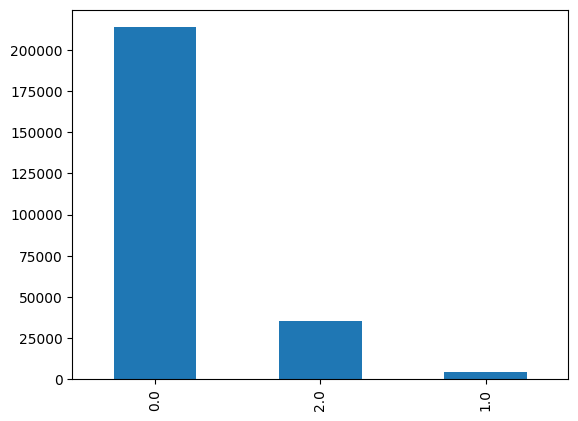

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
diabetes_df['Diabetes_012'].value_counts().plot(ax=ax, kind='bar')

We can see a major class imbalance in the Diabates012 variable. Class for no diabetes has most number of occurences whereas "diabetes" is comparatively less while that for "prediabetes" is neglegible. This can cause issues in model training as we move on, as models trained on this data will have less generalising ability when exposed to other data. 

One workaround for this issue could be to make the dataset more balanced. We can do this in the following steps: 


1.   Convert the prediabetes class to one of the other classes or removing it. We will convert the class to "no diabetes" class as prediabetes is insufficient to be considered as being diabetic.
2.   Reduce rows with "no diabetes" to match that for diabetes. This reduction will be done randomly.


## Remove class imbalance

In [ ]:
#Copy old table to new one.
diabetes_binary = diabetes_df
#Change the diabetics 2 to a 1 and pre-diabetics 1 to a 0, so that we have 0 meaning non-diabetic and pre-diabetic and 1 meaning diabetic.
diabetes_binary['Diabetes_012'] = diabetes_binary['Diabetes_012'].replace({1:0})
diabetes_binary['Diabetes_012'] = diabetes_binary['Diabetes_012'].replace({2:1})

#Change the column name to Diabetes_binary
diabetes_binary = diabetes_binary.rename(columns = {'Diabetes_012': 'Diabetes_binary'})
diabetes_binary.Diabetes_binary.unique()

array([0., 1.])

In [ ]:
diabetes_binary['Diabetes_binary'].value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [ ]:
#Separate the 0(No Diabetes) and 1&2(Pre-diabetes and Diabetes)
#Get the 1s
is1 = diabetes_binary['Diabetes_binary'] == 1
diabetes_5050_1 = diabetes_binary[is1]

#Get the 0s
is0 = diabetes_binary['Diabetes_binary'] == 0
diabetes_5050_0 = diabetes_binary[is0] 

#Select the 39977 random cases from the 0 (non-diabetes group). we already have 35346 cases from the diabetes risk group
diabetes_5050_0_rand1 = diabetes_5050_0.take(np.random.permutation(len(diabetes_5050_0))[:35346])

#Append the 39977 1s to the 39977 randomly selected 0s
diabetes_5050 = diabetes_5050_0_rand1.append(diabetes_5050_1, ignore_index = True)

<ipython-input-43-86c5813cf30b>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  diabetes_5050 = diabetes_5050_0_rand1.append(diabetes_5050_1, ignore_index = True)


In [ ]:
diabetes_5050['Diabetes_binary'].value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [ ]:
diabetes_5050.shape

(70692, 22)

# **2. Exploratory Data Analysis (EDA)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%R
diab_5050_clean <- read.csv('/content/drive/MyDrive/data/diabetes_5050.csv')

In [ ]:
  %%R
 # lets print the summary of our dataframe

 str(diab_5050_clean)

'data.frame':	70692 obs. of  22 variables:
 $ Diabetes_binary     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ HighBP              : num  0 1 1 1 1 1 1 0 1 0 ...
 $ HighChol            : num  0 1 0 1 0 1 1 0 0 0 ...
 $ CholCheck           : num  1 1 1 1 1 1 1 1 1 1 ...
 $ BMI                 : num  29 35 38 27 25 26 20 28 36 24 ...
 $ Smoker              : num  0 1 0 0 1 1 1 1 1 0 ...
 $ Stroke              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: num  0 0 0 0 0 1 0 0 0 0 ...
 $ PhysActivity        : num  1 0 1 1 1 1 1 1 1 1 ...
 $ Fruits              : num  1 0 1 1 0 0 0 0 0 1 ...
 $ Veggies             : num  1 0 1 1 1 1 1 1 1 1 ...
 $ HvyAlcoholConsump   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : num  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : num  0 1 0 0 0 0 0 0 0 0 ...
 $ GenHlth             : num  1 3 2 2 4 4 4 2 2 2 ...
 $ MentHlth            : num  2 20 0 0 2 0 0 0 0 0 ...
 $ PhysHlth            : num  0 3 1 0 20 5 0 0 10 0 ...
 $ DiffWalk            : n

In [ ]:
# changing all variables to factor except for BMI
%%R
# step 1: change all to categorical
diab_5050_clean[] <- lapply(diab_5050_clean, factor)

# step 2: revert BMI, MentHlth, PhysHlth to integer
diab_5050_clean$BMI <- as.numeric(diab_5050_clean$BMI)
diab_5050_clean$MentHlth <- as.numeric(diab_5050_clean$MentHlth)
diab_5050_clean$PhysHlth <- as.numeric(diab_5050_clean$PhysHlth)

In [ ]:
%%R
str(diab_5050_clean)

'data.frame':	70692 obs. of  22 variables:
 $ Diabetes_binary     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HighBP              : Factor w/ 2 levels "0","1": 1 2 2 2 2 2 2 1 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 1 2 1 2 1 2 2 1 1 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ BMI                 : num  18 24 27 16 14 15 9 17 25 13 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 1 2 1 1 2 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 2 1 2 2 1 1 1 1 1 2 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0"

## Diabetes column

In [ ]:
# Since our research question is whether someone has a diabetes or not, let us first perform a univariate analysis:
%%R
table(diab_5050_clean$Diabetes_binary)


    0     1 
35346 35346 


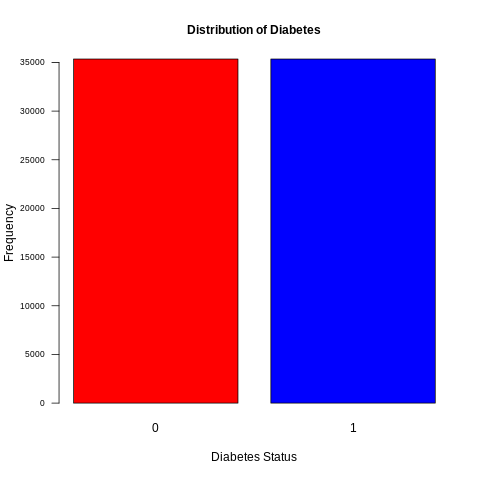

In [ ]:
# visualising the above result
%%R
barplot(table(diab_5050_clean$Diabetes_binary), col = c("red", "blue", "orange"), main = "Distribution of Diabetes", xlab = "Diabetes Status", ylab = "Frequency", cex.lab = 1.0, cex.main = 1.0, las = 1, cex.axis = 0.7)


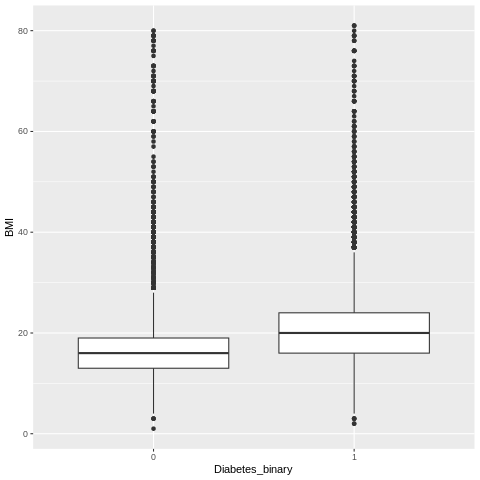

In [ ]:
# boxplot of BMI vs Diabetes_binary
%%R
diab_plot1 = ggplot(diab_5050_clean, aes(x = Diabetes_binary, y = BMI)) + geom_boxplot()
diab_plot1

## BMI

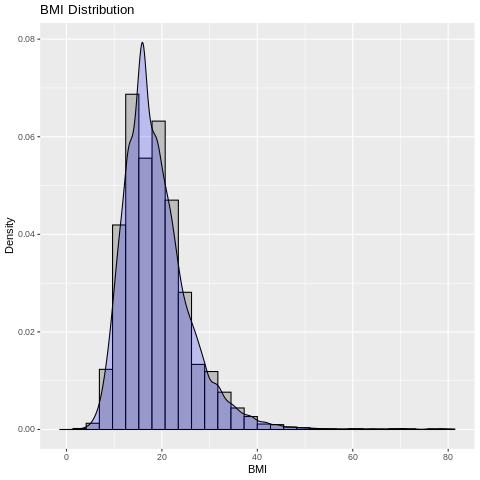

In [ ]:
%%R
# histogram and density plot for BMI
ggplot(diab_5050_clean, aes(x = BMI)) +
# histogram with density instead of count on y-axis
  geom_histogram(aes(y = ..density..), fill = "grey", colour="black", bins = 30) +
# density plot with transparent blue colour
  geom_density(alpha=.2,fill = "blue", bw = 0.7) +
  xlab("BMI") +
  ylab("Density") +
  ggtitle("BMI Distribution")+
  scale_x_continuous(labels = comma)



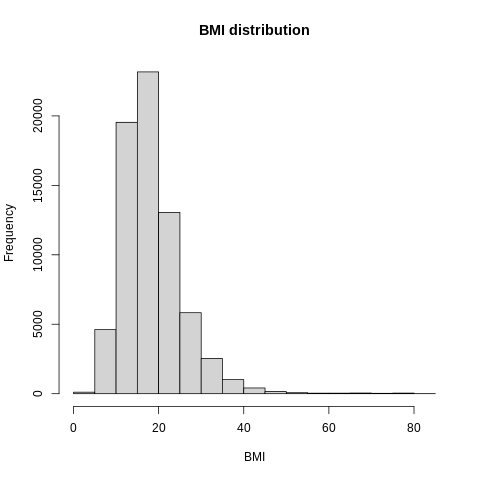

In [ ]:
%%R
#histogram for BMI, MentHlth, and PhysHlth
hist(diab_5050_clean$BMI, xlab = "BMI", ylab = "Frequency", main = "BMI distribution")


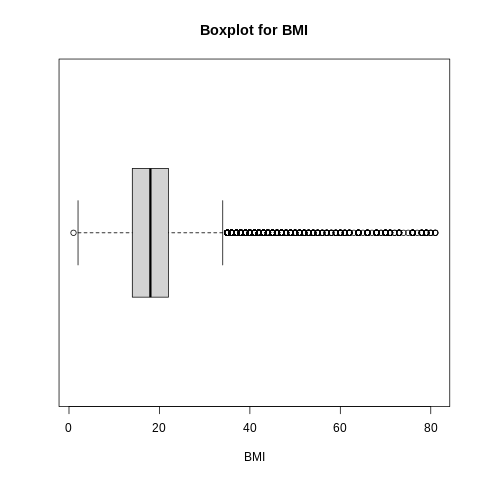

In [ ]:
%%R
# Let's visualise the individual boxplots for our numerical variables

# boxplot for BMI
boxplot(diab_5050_clean$BMI, horizontal = T, notch = F,
        xlab = "BMI")
title("Boxplot for BMI")

## Mental Health and Physical Health

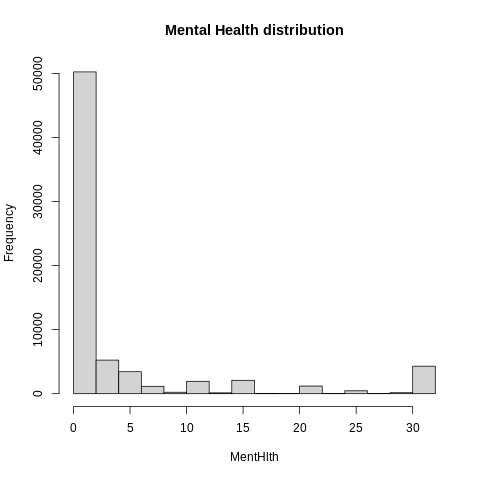

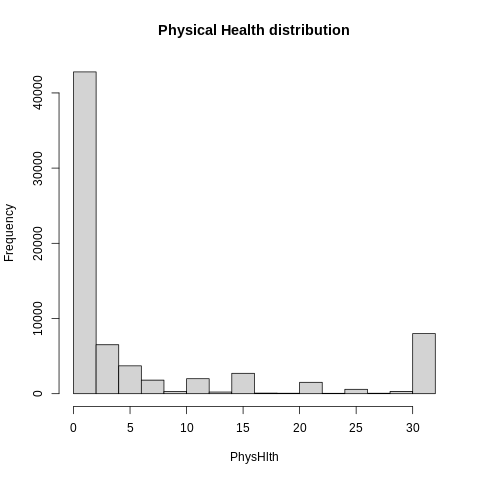

In [ ]:
%%R
hist(diab_5050_clean$MentHlth, xlab = "MentHlth", ylab = "Frequency", main = "Mental Health distribution")
hist(diab_5050_clean$PhysHlth, xlab = "PhysHlth", ylab = "Frequency", main = "Physical Health distribution")

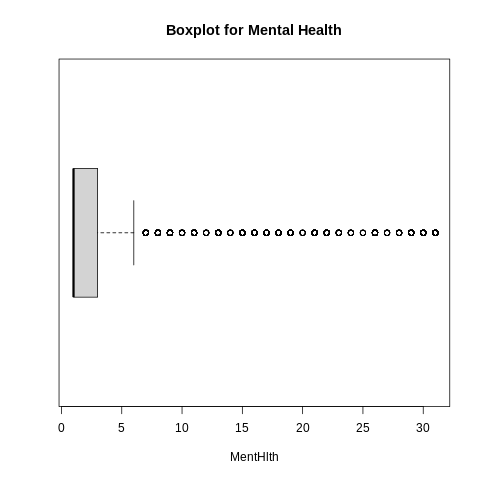

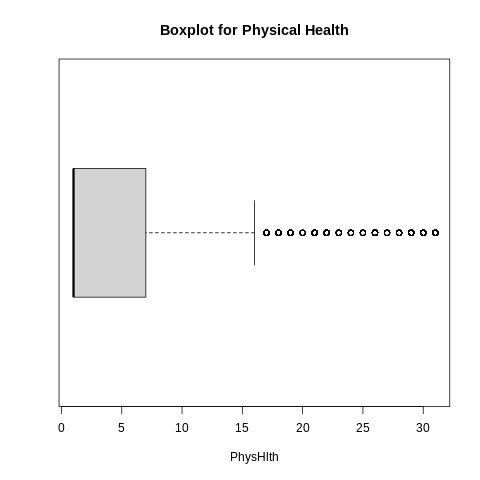

In [ ]:
%%R
# Let's visualise the individual boxplots for our numerical variables


# boxplot for MenthHlth
boxplot(diab_5050_clean$MentHlth, horizontal = T, notch = F,
        xlab = "MentHlth")
title("Boxplot for Mental Health")

# boxplot for PhysHlth
boxplot(diab_5050_clean$PhysHlth, horizontal = T, notch = F,
        xlab = "PhysHlth")
title("Boxplot for Physical Health")

#barplot(table(diab_5050_clean$PhysHlth))

## Distribution of categorical variables

In [ ]:
%%R
# Create a vector of column names to plot
cols_to_plot <- c()

# Loop through the columns and create a bar plot for each one
for (col in cols_to_plot) {
  # Create the bar plot
  barplot(mydata[, col], main=col, xlab="X-axis label", ylab="Y-axis label")
}

## Correlation between numerical variables

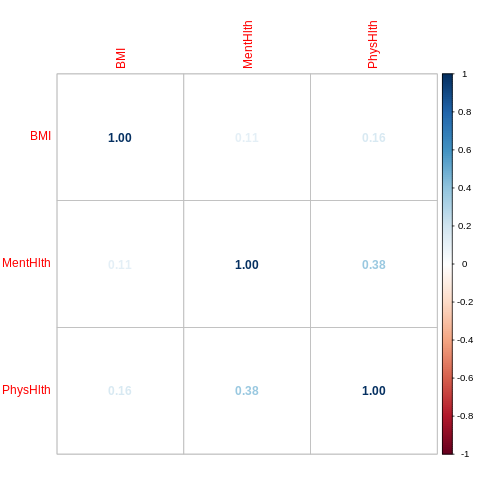

In [ ]:
%%R

#Correlation matrix to see correlation between numerical variables
library(corrplot)
cor.matrix = cor(diab_5050_clean[sapply(diab_5050_clean, function(x) !is.factor(x))])
corrplot(cor.matrix, method = 'number')

Let's check if these corelation between numerical variables are significant or not

In [ ]:
%%R

# cor test for MenthHlth vs BMI
cor.test(diab_5050_clean$MentHlth,diab_5050_clean$BMI)



	Pearson's product-moment correlation

data:  diab_5050_clean$MentHlth and diab_5050_clean$BMI
t = 29.427, df = 70690, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1027207 0.1172856
sample estimates:
      cor 
0.1100091 



In [ ]:
%%R
# cor test PhysHlth vs BMI
cor.test(diab_5050_clean$PhysHlth,diab_5050_clean$BMI)


	Pearson's product-moment correlation

data:  diab_5050_clean$PhysHlth and diab_5050_clean$BMI
t = 43.264, df = 70690, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1534207 0.1677837
sample estimates:
      cor 
0.1606107 



In [ ]:
    %%R
# cor test MenthHlth vs PhysHlth
cor.test(diab_5050_clean$MentHlth,diab_5050_clean$PhysHlth)


	Pearson's product-moment correlation

data:  diab_5050_clean$MentHlth and diab_5050_clean$PhysHlth
t = 107.65, df = 70690, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3689301 0.3815971
sample estimates:
      cor 
0.3752812 



## Numerical features vs Diabetes012 Visualisation

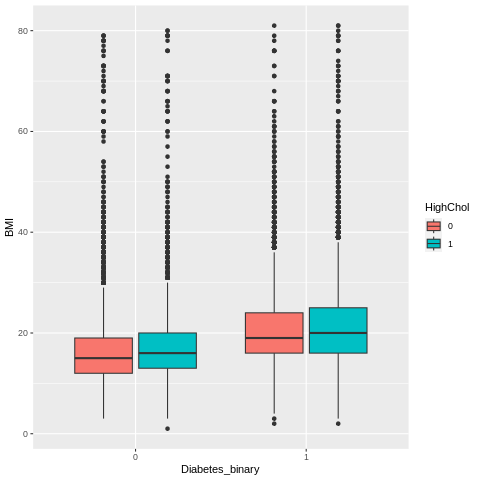

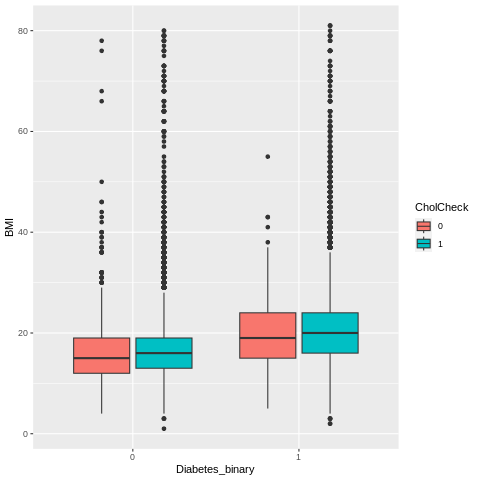

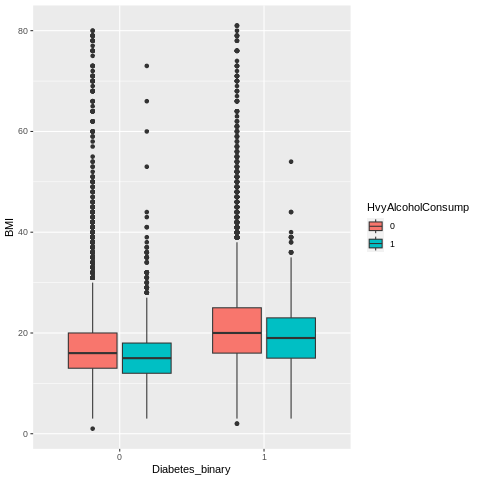

In [ ]:
# combined boxplot of BMI vs Diabetes_binary showing HighChol, CholCheck, and HvyAlcoholConsump
%%R
combined_plot1 = ggplot(diab_5050_clean, aes(x = Diabetes_binary, y = BMI, fill = HighChol)) + geom_boxplot()
combined_plot2 = ggplot(diab_5050_clean, aes(x = Diabetes_binary, y = BMI, fill = CholCheck)) + geom_boxplot()
combined_plot3 = ggplot(diab_5050_clean, aes(x = Diabetes_binary, y = BMI, fill = HvyAlcoholConsump)) + geom_boxplot()

print(combined_plot1)
print(combined_plot2)
print(combined_plot3)

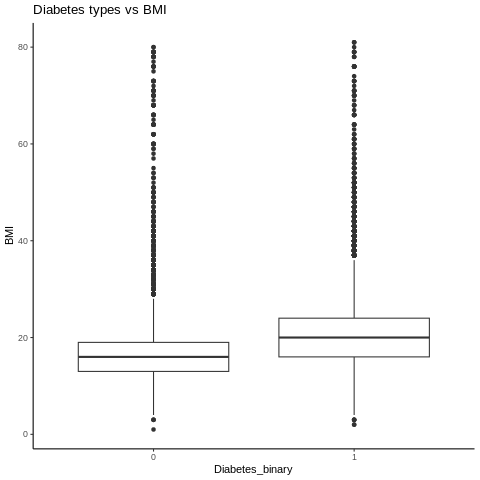

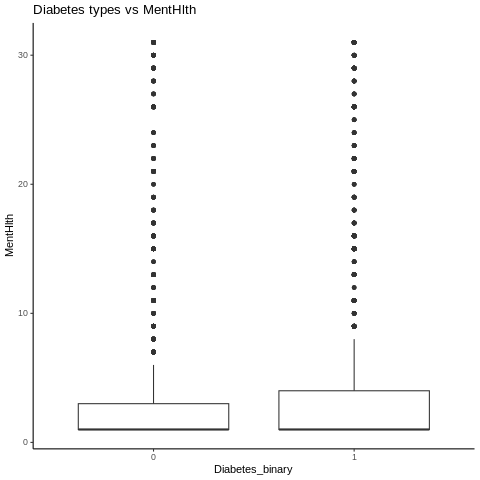

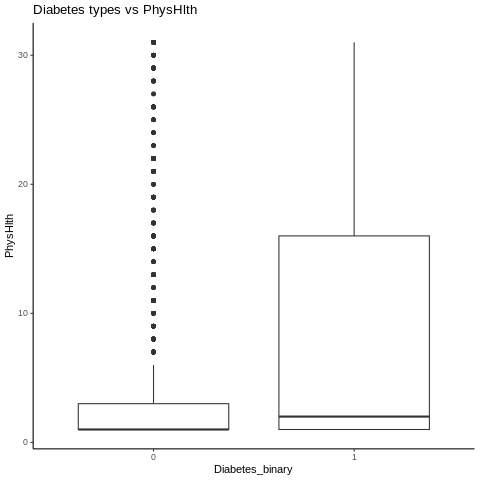

In [ ]:
# Check for outliers and differences
%%R


plot1 = ggplot(diab_5050_clean, aes(x=Diabetes_binary, y=BMI))+ geom_boxplot() + theme_classic()+ ggtitle("Diabetes types vs BMI") 
plot2 = ggplot(diab_5050_clean, aes(x=Diabetes_binary, y=MentHlth))+ geom_boxplot() + theme_classic()+ ggtitle("Diabetes types vs MentHlth")
plot3 = ggplot(diab_5050_clean, aes(x=Diabetes_binary, y=PhysHlth))+ geom_boxplot() + theme_classic()+ ggtitle("Diabetes types vs PhysHlth")

print(plot1)
print(plot2)
print(plot3)

In [ ]:
%%R
#Check for the difference in terms of mean
aggregate(BMI~Diabetes_binary, data=diab_5050_clean, FUN="mean")  
aggregate(MentHlth~Diabetes_binary, data=diab_5050_clean, FUN="mean") 
aggregate(PhysHlth~Diabetes_binary, data=diab_5050_clean, FUN="mean")

  Diabetes_binary PhysHlth
1               0 4.678719
2               1 8.954479


In [ ]:
%%R
# Check if the difference is significant
summary(aov(diab_5050_clean$BMI~diab_5050_clean$Diabetes_binary))
summary(aov(diab_5050_clean$MentHlth~diab_5050_clean$Diabetes_binary))
summary(aov(diab_5050_clean$PhysHlth~diab_5050_clean$Diabetes_binary))

                                   Df  Sum Sq Mean Sq F value Pr(>F)    
diab_5050_clean$Diabetes_binary     1  323100  323100    3334 <2e-16 ***
Residuals                       70690 6849607      97                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Categorical features vs Target variable

In [ ]:
%%R
# Create a list of categorical variables
cat_vars <- c("HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack",
              "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
              "NoDocbcCost", "GenHlth", "DiffWalk", "Sex",  "Age", "Education", "Income")



# Loop through each categorical variable and perform a chi-squared test
for (var in cat_vars) {
  result <- chisq.test(table(diab_5050_clean$Diabetes_binary, diab_5050_clean[[var]]))
  cat(paste("Chi-squared test for", var, ":\n"))
  print(result)
}

Chi-squared test for HighBP :

	Pearson's Chi-squared test with Yates' continuity correction

data:  table(diab_5050_clean$Diabetes_binary, diab_5050_clean[[var]])
X-squared = 10367, df = 1, p-value < 2.2e-16

Chi-squared test for HighChol :

	Pearson's Chi-squared test with Yates' continuity correction

data:  table(diab_5050_clean$Diabetes_binary, diab_5050_clean[[var]])
X-squared = 5877.6, df = 1, p-value < 2.2e-16

Chi-squared test for CholCheck :

	Pearson's Chi-squared test with Yates' continuity correction

data:  table(diab_5050_clean$Diabetes_binary, diab_5050_clean[[var]])
X-squared = 979.12, df = 1, p-value < 2.2e-16

Chi-squared test for Smoker :

	Pearson's Chi-squared test with Yates' continuity correction

data:  table(diab_5050_clean$Diabetes_binary, diab_5050_clean[[var]])
X-squared = 538.16, df = 1, p-value < 2.2e-16

Chi-squared test for Stroke :

	Pearson's Chi-squared test with Yates' continuity correction

data:  table(diab_5050_clean$Diabetes_binary, diab_5050_cl

## Feature extraction 

We have too many variables and need to find out which ones matter the most for our prediction. We attempt a stepwise function. But first we need to create a smaller subsample out of our large dataset and perform logistic regresson on the maximal model.

In [ ]:
%%R
set.seed(399)
# fit logistric regression on our maximal model
sample.lr.max <- glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Smoker + Stroke + HeartDiseaseorAttack +
                          PhysActivity + Fruits + Veggies + HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + GenHlth +
                          MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + Income, data = diab_5050_clean, family="binomial")

# view model summary
summary(sample.lr.max)


Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + Smoker + Stroke + HeartDiseaseorAttack + PhysActivity + 
    Fruits + Veggies + HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + 
    GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + 
    Income, family = "binomial", data = diab_5050_clean)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3780  -0.8088  -0.0080   0.8243   3.0577  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -6.187539   0.331609 -18.659  < 2e-16 ***
HighBP1                0.731513   0.019783  36.977  < 2e-16 ***
HighChol1              0.548199   0.018997  28.857  < 2e-16 ***
CholCheck1             1.314878   0.080929  16.247  < 2e-16 ***
BMI                    0.070221   0.001565  44.869  < 2e-16 ***
Smoker1               -0.036912   0.019062  -1.936 0.052818 .  
Stroke1                0.154319   0.040460   3.814 0.000137 ***
HeartDiseaseorAtt

Running the step function below:

In [ ]:
%%R
set.seed(399)
step_model <- step(sample.lr.max, method ="glm")
summary(step_model)

Start:  AIC=72055.54
Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Smoker + 
    Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + Veggies + 
    HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + GenHlth + 
    MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + 
    Income

                       Df Deviance   AIC
- NoDocbcCost           1    71964 72054
- Fruits                1    71965 72055
<none>                       71964 72056
- PhysActivity          1    71966 72056
- AnyHealthcare         1    71967 72057
- Veggies               1    71967 72057
- Smoker                1    71967 72057
- MentHlth              1    71970 72060
- PhysHlth              1    71972 72062
- Stroke                1    71978 72068
- DiffWalk              1    71994 72084
- Education             5    72010 72092
- HeartDiseaseorAttack  1    72065 72155
- Income                7    72131 72209
- HvyAlcoholConsump     1    72179 72269
- Sex                   1    72200 72290
- Chol

Our minimal model from the step function:

Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + Smoker + Stroke + HeartDiseaseorAttack + PhysActivity + Veggies + 
    HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + GenHlth + MentHlth + PhysHlth + DiffWalk + 
    Sex + Age + Education + Income

The step function reduced the number features to 19, which is a small reduction. This along with the results from the chi square test suggest that most of the variables could be significant. We will use these 19 features as input to our predictive models.

In [ ]:
%%R
# Create the new dataset
final_df <- diab_5050_clean[, c("Diabetes_binary", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker", 
                                "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Veggies", 
                                "HvyAlcoholConsump", "AnyHealthcare", "GenHlth", "MentHlth", 
                                "PhysHlth", "DiffWalk", "Sex", "Age", "Education", "Income")]

# salva il file CSV sulla tua macchina locale
head(final_df)

  Diabetes_binary HighBP HighChol CholCheck BMI Smoker Stroke
1               0      0        0         1  18      0      0
2               0      1        1         1  24      1      0
3               0      1        0         1  27      0      0
4               0      1        1         1  16      0      0
5               0      1        0         1  14      1      0
6               0      1        1         1  15      1      0
  HeartDiseaseorAttack PhysActivity Veggies HvyAlcoholConsump AnyHealthcare
1                    0            1       1                 0             1
2                    0            0       0                 0             0
3                    0            1       1                 0             1
4                    0            1       1                 0             1
5                    0            1       1                 0             1
6                    1            1       1                 0             1
  GenHlth MentHlth PhysHlth DiffWa

In [ ]:
%%R

# Salva il dataframe come file CSV
file_path <- "/content/drive/MyDrive/data/final_df.csv"
write.csv(final_df, file_path, row.names = FALSE)

# Visualizza il contenuto del file salvato
file.show(file_path)


Output streaming troncato alle ultime 5000 righe.

"1","1","1","1",27,"1","0","0","1","1","0","1","2",7,3,"0","1","7","6","8"

"1","1","1","1",17,"1","0","1","0","1","0","1","5",1,21,"1","1","7","6","4"

"1","0","0","1",10,"0","0","0","1","1","0","1","4",21,31,"1","0","8","5","6"

"1","1","1","1",32,"0","0","0","0","0","0","1","4",1,16,"1","1","10","5","6"

"1","0","0","1",41,"1","0","0","1","0","0","1","3",1,4,"0","0","5","4","4"

"1","1","1","1",28,"1","0","0","1","0","0","1","1",1,1,"0","1","8","5","8"

"1","1","1","1",15,"1","0","0","0","1","0","1","4",6,11,"0","0","9","4","2"

"1","1","1","1",17,"1","0","0","1","0","0","0","3",11,1,"0","1","3","4","1"

"1","0","1","1",17,"0","0","0","0","0","0","1","3",6,1,"1","0","11","4","3"

"1","1","0","1",20,"1","0","1","1","1","0","1","4",1,1,"1","1","10","5","2"

"1","1","1","1",29,"0","0","1","0","1","0","1","4",1,1,"1","0","10","5","7"

"1","1","1","1",31,"0","0","0","1","1","0","1","3",1,1,"1","1","8","5","7"

"1","1","1","1",22,"1","0",